In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel
from sklearn.metrics import mean_squared_error, r2_score

X_train
X is r.s. from Unif(0,1). (n=20)
reshape(row=-1(auto), col=1)
np.sort -> ascending

Y is pop + error (n=X_train.shape의 1st index, i.e. sample size)

In [64]:
def true_function(X):
    return np.sin(3*X) + 0.3*np.cos(9*X)

np.random.seed(0)
n=200
X_train = np.sort(np.random.uniform(0, 5, n)).reshape(-1, 1)
y_train = true_function(X_train) + np.random.normal(0, 0.3, X_train.shape[0]).reshape(-1, 1)
X_test = np.linspace(0, 5, 100).reshape(-1, 1)

In [65]:
kernel = RBF() + WhiteKernel()

gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=200,
                               random_state=0)
gpr.fit(X_train, y_train)

GaussianProcessRegressor(kernel=RBF(length_scale=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=200, random_state=0)

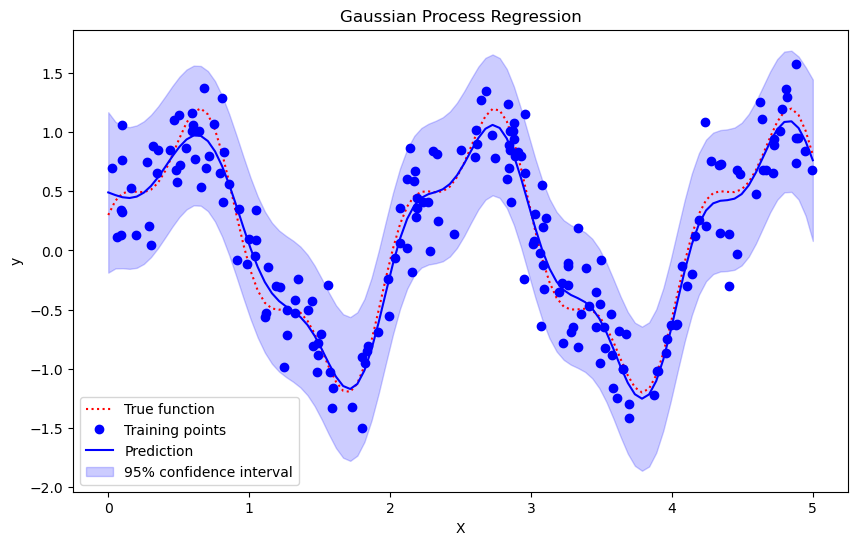

In [66]:
y_pred, sigma = gpr.predict(X_test, return_std=True)

plt.figure(figsize=(10, 6))
plt.plot(X_test, true_function(X_test), 'r:', label='True function')
plt.plot(X_train, y_train, 'bo', label='Training points')
plt.plot(X_test, y_pred, 'b-', label='Prediction')
plt.fill_between(X_test.ravel(), y_pred.ravel() - 1.96*sigma, y_pred.ravel() + 1.96*sigma,
                 alpha=0.2, color='b', label='95% confidence interval')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

In [53]:
y_pred = gpr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

NameError: name 'y_test' is not defined